# Power calculations for a binomial proportion

## Background

In an ideal statistical world no hypothesis test would be run before a [power analysis](https://en.wikipedia.org/wiki/Power_of_a_test) has been carried out to determine a reasonable [sample size](https://en.wikipedia.org/wiki/Sample_size_determination). Most researchers carrying out statistical hypothesis testing only focus on the type-I error: the probability of erreneously rejecting a null hypothesis. Since the null hypothesis is synonymous with the "no effects" regime, this amounts to controlling the number spurious discoveries. Sophisticated techniques have also been developed to control the type-I error under the problem of [multiple comaparisons](https://en.wikipedia.org/wiki/Multiple_comparisons_problem). This focus on type-I error leads to significant problem in academic research: inflated effect size estimates. Unfortunately, advanced statistical methods give researchers a false confidence that their "significant" discoveries are "true", in the sense that they are probably not *completely* spurious.  

The power of the test is probality of rejecting the null when it is false. In the "no effects" regime this is equivalent to correctly concluding there is some real effect. Power is inversely related to effect size bias because results that are statistically significant go through a filter: only realized statisticals below a certain p-value are examined. If the power of a test is large, then the descrepancy between the distribution of the statistic conditional on statistically significance will be similar to its unconditional distribution.[[^1]] Generally speaking, a test that with a large power, say 80%, will have a fairly small effect size bias. 

Power analysis is by no means absent from empirical research. It is essential for grant funding applications in biomedical research and the design of clinical trials. I suspect that as statistics have moved towards "big data" and "analytics" the cultural emphasis on a well-designed statistical procedure has shifted to "mining" for hidden results. In such situations estimating the power is impossible because its not even clear what the hypothesis test is! Another reason power is less focused on is that it is harder to carry out. A researcher needs to make several assumptions that are normally not needed for calculating type-I errors including the estimated signal size and sometimes other nuissance parameters.

This post is about how to calculate the number of samples that will be needed to obtain a specified power for a test of a binomial proportion. Anytime there is a binary outcome which is being measured in aggregate (between groups, systems, cities, etc) we can ask whether this proportion is different than some amount. For example is there a difference in the rate of high-school completion between sexes or does a medical test have a better true positive rate than an existing tool? Constructing [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) for [binomial proportions](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval) is statistically tricky because a binomial proportion's distribution is often unknown. Asymptotically this proportion will actually have a normal distribution, and this normal approximation is often used in practice. 

This post will provide analytic ways of calculating the sample size for binomial confidence intervals for both normal and more advanced methods. There are several key recommendations. First, under no circumstances should a naive version of the normal approximation method be used. 


## Preliminaries

To quickly establish some notation that will be used throughout the post: we are considering the proportion of successes in a binomial trial: $p=y / n$, where $y \sim \text{Binom}(\pi, n)$. Therefore $E(p)=\pi$ and $Var(p)=\pi(1-\pi)/n = \sigma^2_\pi$. Assymptotically it is known that $p$ can be transformed so that it is normally distributed: $z=(p - \pi)/\sigma_\pi \sim N(0,1)$. Suppose we measure the proportions from two different IID groups 1 and 2: $p_1$ and $p_2$, $E(p_i)=\pi_i$, with $n_1$ and $n_2$ samples. If we want to establish whether group 1 has a higher proportion than group 2 will specify a null and alternative hypothesis as follows:

$$
\begin{align*}
H_0 &: \pi_1 \leq \pi_2 \\
H_A &: \pi_1 > \pi_2, \hspace{3mm} \pi_1 - \pi_2 = \Delta > 0 \\
z_0 &= \frac{p_1 - p_2}{\sigma_{\pi_0}} \\
\sigma_{\pi}^2 &= \frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2} \\
\sigma_{\pi_0}^2 &= \sigma_{\pi} | H_0 = \frac{\pi_1(1-\pi_1)}{n}(w_1 + w_2) \\
n &= n_1+n_2, \hspace{3mm} w_i = n / n_i
\end{align*}
$$

Note that in the null I assume $\pi_1=\pi_2$ rather than $\pi_1 < \pi_2$, both of which conditions could be true under the null. However, the former case is the most conservative assumption for our subsequent power analysis and should be used.  Also note that the symbol $\Phi$ refers to the standard normal CDF, which will be used throughout the post. The hat notation refers to a realization of the random variable so that $p_1$ is a random variable and $\hat p_1$ is a realization of the proportion for group 1. If $z_0 > t_\alpha$ we will reject the null, where $P(z_0 > t_\alpha | H_0) = \alpha$. The type-II error will be denoted as $\beta$ so that $P(z_A > t_\alpha | H_A) = 1-\beta$ is the power.

## (1) Normal approximation approach 

Assume that $n$ is large enough that we can use the z-score formula seen in the preliminaries. Then it is easy enough to derive an approximation for the power calculation as follows:

$$
\begin{align*}
z_A = z | H_A &= \frac{p_1 - p_2 - \Delta}{\sigma_{\pi_A}} \sim N(0,1) \\
\sigma_{\pi_A}^2 &= \frac{\pi_1(1-\pi_1)}{n_1} + \frac{(\pi_1-\Delta)(1-(\pi_1-\Delta))}{n_2} \\
&= \sigma_{\pi_0}^2 + \epsilon, \hspace{3mm} \epsilon=\frac{\Delta(2\pi_1-1)-\Delta^2}{n_2}
\end{align*}
$$

Because $\epsilon(\Delta,\pi_1,n_2)$ is $O(n_2^{-1})$ it is often ignored in the analysis since for large enough $n_2$ it is basically zero. If one sets $\epsilon=0$, then there is a closed-form solution to solving for a specific power:

$$
\begin{align*}
P( z > t_\alpha) &= P\Bigg( \frac{p_1 - p_2}{\sigma_{\pi_0}} > t_\alpha \Bigg) \\
&= P\Bigg( \frac{p_1 - p_2}{\sigma_{\pi_0}}-\frac{\Delta}{\sigma_{\pi_0}}+\frac{\Delta}{\sigma_{\pi_0}} > t_\alpha | H_A \Bigg) \\
&= P\Bigg( z_A > t_\alpha - \frac{\Delta}{\sigma_{\pi_0}} | H_A \Bigg) \\
1-\beta &= \Phi(\Delta / \sigma_{\pi_0}-t_\alpha) \\
\frac{1}{\sigma_{\pi_0}}&= \frac{(\Phi^{-1}_{1-\beta} + t_\alpha)}{\Delta} \\
\frac{n_1n_2}{n} &= \frac{\pi_1(1-\pi_1)(\Phi^{-1}_{1-\beta} + t_\alpha)^2}{\Delta^2}
\end{align*}
$$

If the two groups have the same sample size: $n_1 = n_2$, then the exact formula is:

$$
\begin{align}
n^* &= 2\cdot \frac{\pi_1(1-\pi_1)(\Phi^{-1}_{1-\beta} + t_\alpha)^2}{\Delta^2} \label{eq:simple1}
\end{align}
$$

The terms in equation \eqref{eq:simple1} are intuitive. Higher power ($\Phi^{-1}_{1-\beta}$) or a lower type-I error rate ($t_\alpha$) require an increasing number of samples, the latter because the threshold to become significant is higher. Increases in the binomial variance ($\pi(1-\pi)$) or a smaller difference in the proportions ($\Delta$) require more samples as there is more noise and less signal, respectively.  Though equation \eqref{eq:simple1} is elegant, it has several limitations. First, its variance is off ignores $\epsilon$ term. Second it assumes an equal number of samples between groups 1 and 2. Instead it is much better to analytically solve for $n_1$,

$$
\begin{align}
\arg\min_{n_1} \hspace{3mm} \big[ 1/\sigma_{\pi_A}(n_1,n_2,\pi_1,\Delta) - (\Phi^{-1}_{1-\beta} + t_\alpha)/\Delta \big]^2 \label{eq:argmin1}
\end{align}
$$

Where $n_2$, $\pi_1$, $\Delta$, $\alpha$, and $\beta$ are treated as fixed parameters and the power can be directly targeted by $n_1$ as equation \eqref{eq:argmin1} shows. The code block below will compare approaches \eqref{eq:simple1} and \eqref{eq:argmin1} to see how well there predicted power lines up with reality.

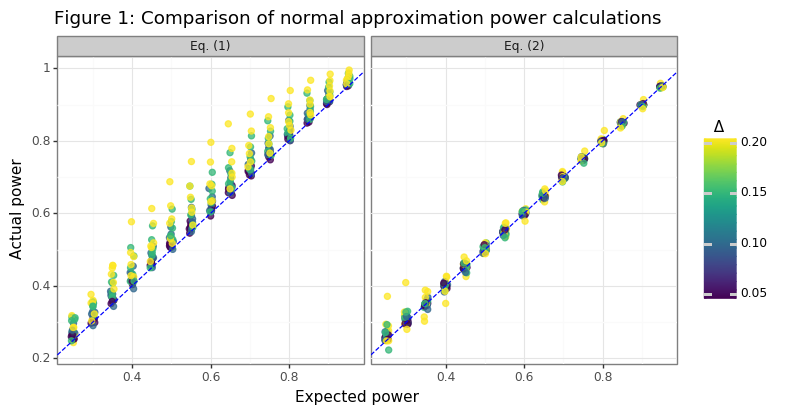

<ggplot: (8780654409049)>


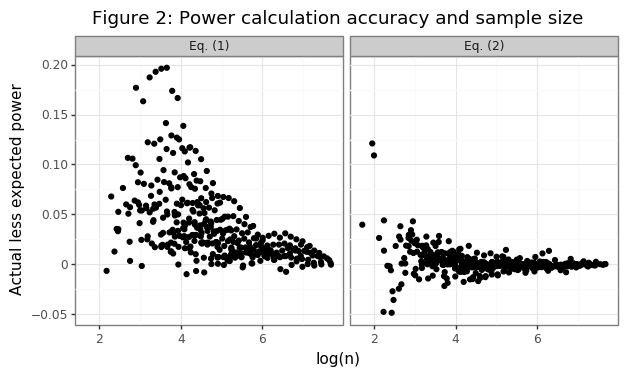

<ggplot: (8780809204265)>


In [6]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import plotnine
from plotnine import *
seed = 1234 # Use throughout post
from scipy.optimize import minimize_scalar

np.seterr(invalid='ignore')

def sig_n12(n1, pi1, Delta, n2=None):
    pi2 = pi1 - Delta
    assert (pi2 > 0)
    if n2 is None:
        n2 = n1
    else:
        n2 = np.log(n2)
    return np.sqrt(pi1*(1-pi1)/np.exp(n1) + pi2*(1-pi2)/np.exp(n2))


def power_eq1(pi1, Delta, alpha, power):
    return 2*pi1*(1-pi1)*(norm.ppf(power) + norm.ppf(1-alpha))**2 / Delta**2


def power_eq2(pi1, Delta, alpha, power, n2=None):
    """
    POWER FOR ONE-SIDED HYPOTHESIS TEST, DELTA>0
    Delta=E(p1)-E(p2), alpha=E(z>t|H_0), beta=E(z<t|H_0)
    """
    rhs = (norm.ppf(power) + norm.ppf(1-alpha))/Delta
    n1star = np.exp(minimize_scalar(fun=lambda x: (1/sig_n12(x, pi1=pi1, Delta=Delta, n2=n2) - rhs)**2).x)
    n2star = n2
    if n2 is None:
        n2star = n1star
    lhs = 1/sig_n12(n1=np.log(n1star), pi1=pi1, Delta=Delta, n2=n2star)
    assert np.abs(lhs - rhs) < 1e-5
    return n1star, n2star

nsim = 100000
alpha = 0.05
t_alpha = norm.ppf(1-alpha)
pi_seq = np.round(np.arange(0.25,0.51,0.05),2)
delta_seq = np.round(np.arange(0.05,0.25,0.05),2)
power_seq = np.round(np.arange(0.25,1,0.05),2)

np.random.seed(seed)
count = 0
holder = []
for pi in pi_seq:
    for delta in delta_seq:        
        for power in power_seq:
            count += 1
            n_eq1 = power_eq1(pi, delta, alpha, power)
            n_eq2 = power_eq2(pi, delta, alpha, power)[0]
            # Generate data for different groups
            phat1_g1 = np.random.binomial(n_eq1, pi, size=nsim)/n_eq1
            phat1_g2 = np.random.binomial(n_eq1, pi-delta, size=nsim)/n_eq1
            phat2_g1 = np.random.binomial(n_eq2, pi, size=nsim)/n_eq2
            phat2_g2 = np.random.binomial(n_eq2, pi-delta, size=nsim)/n_eq2
            se1 = np.sqrt(phat1_g1*(1-phat1_g1)/n_eq1 + phat1_g2*(1-phat1_g2)/n_eq1)
            se2 = np.sqrt(phat2_g1*(1-phat2_g1)/n_eq2 + phat2_g2*(1-phat2_g2)/n_eq2)
            z1 = (phat1_g1-phat1_g2)/se1
            z2 = (phat2_g1-phat2_g2)/se2
            p1, p2 = np.mean(z1 > t_alpha), np.mean(z2 > t_alpha)
            tmp = pd.DataFrame({'pi':pi, 'Delta':delta,'power':power,'p1':p1, 'p2':p2, 'n1':n_eq1, 'n2':n_eq2},index=[count])
            holder.append(tmp)
sim1 = pd.concat(holder).melt(['pi','Delta','power'],None,'method')
sim1 = sim1.assign(metric=lambda x: x.method.str[0], approach=lambda x: x.method.str[1]).drop(columns = 'method')
sim1 = sim1.pivot_table('value',['pi','Delta','power','approach'],'metric').reset_index()

plotnine.options.figure_size = (8,4)
gg_sim1 = (ggplot(sim1, aes(x='power',y='p',color='Delta')) + theme_bw() + 
           geom_jitter(random_state=seed, height=0,width=0.005,alpha=0.75,size=2) + 
           labs(x='Expected power', y='Actual power') + 
           geom_abline(slope=1, intercept=0,linetype='--',color='blue') + 
           facet_wrap('~approach',labeller=labeller(approach={'1':'Eq. (1)','2':'Eq. (2)'})) + 
           ggtitle('Figure 1: Comparison of normal approximation power calculations') + 
           scale_color_continuous(name='  Δ'))
print(gg_sim1)

plotnine.options.figure_size = (7,3.5)
gg_power_n = (ggplot(sim1.assign(err=lambda x: x.p - x.power), aes(x='np.log(n)',y='err')) + theme_bw() + 
               geom_point() + 
               labs(x='log(n)', y='Actual less expected power') + 
               facet_wrap('~approach',labeller=labeller(approach={'1':'Eq. (1)','2':'Eq. (2)'})) + 
               ggtitle('Figure 2: Power calculation accuracy and sample size'))
print(gg_power_n)

Figure 1 shows that equation \eqref{eq:simple1} over predicts the number of samples that are needed (actual power exceeds predicted power), especially for large values of $\Delta$. This is to be expected since the variance formula ignores this term. In contrast \eqref{eq:argmin1} provides much tighter predictions. However both approaches suffer from inaccurate power estimates for small sample sizes, as Figure 2 shows. This is be expected because the normal approximation becomes increasingly imprecise for small sample sizes. The underlying reason for the descrepancy is that the lower-bound does not provide the actual coverage as expected:

$$
\begin{align*}
&\text{Coverage of lower bound} \\
P(\hat p_1 &> \hat p_2 - \sigma_{\hat \pi} \cdot t_\alpha | H_0 ) \neq 1-\alpha, \text{when $n$ is small}
\end{align*}
$$

The simulations below show the coverage errors as a function of sample size using equation \eqref{eq:argmin1}.

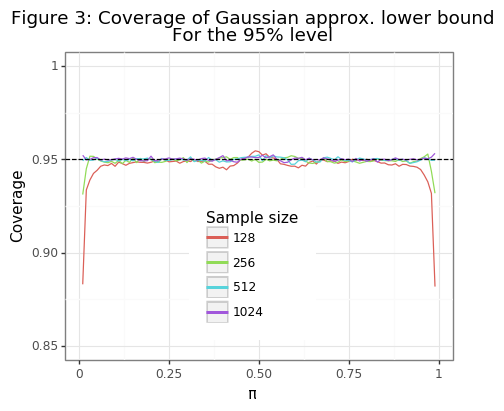

<ggplot: (8780669278589)>

In [7]:
nsim = 100000
pi_seq = np.round(np.arange(0.01,1,0.01),2)
n_seq = 2**np.arange(7,11,1)

holder = []
for pi in pi_seq:
    for n in n_seq:
        phat1 = np.random.binomial(n, pi, size=nsim)/n
        phat2 = np.random.binomial(n, pi, size=nsim)/n
        se = np.sqrt(phat1*(1-phat1)/n + phat2*(1-phat2)/n)
        coverage = np.mean(phat1 > phat2 - se*t_alpha)
        tmp = pd.DataFrame({'pi':pi,'n':n,'coverage':coverage},index=[0])
        holder.append(tmp)
sim_coverage = pd.concat(holder).reset_index(None,True).assign(n=lambda x: pd.Categorical(x.n, x.n.unique()))

plotnine.options.figure_size = (5, 4)
gg_coverage = (ggplot(sim_coverage, aes(x='pi',y='coverage',color='n'))+
               theme_bw() + geom_line() + 
               labs(x='π',y='Coverage') + 
               ggtitle('Figure 3: Coverage of Gaussian approx. lower bound\nFor the 95% level') + 
               scale_color_discrete(name='Sample size') + 
               theme(legend_position=(0.5,0.35)) + 
               scale_y_continuous(limits=[0.85,1.0],breaks=list(np.arange(0.85,1.01,0.05))) + 
               geom_hline(yintercept=0.95,linetype='--'))
gg_coverage

Figure 3 shows that for small sample sizes and small true proportion values ($\pi$) the lower bound for the Gaussian approximation does a poor job at actually containing the true parameter ($\pi$) at a coverage of $1-\alpha$ as would be expected if the distribution was exact.

## (2) Exact binomial distribution

If $p_i = y_i / n$ and $y_i \sim \text{Binom}(n,\pi_i)$ comes from a binomial distribution then the CIs do not need to be based on *approximations* because they can be calculated using the exact quantiles. However this approach is used less often than would normally be expected for two reasons. First, because the binomial distribution is discrete, the CDF may have large jumps. For example, consider the distribution of 20 fair coin flips where the probability that 14/15 or more heads will occur is 5.8%/2.1%, respectively. Second, the distribution between differences in binomials is a non-standard distribution. Clearly no threshold could be chosen which ensured *exactly* a 5% type-I error rate. Instead we would need to be conservative and pick 15 or more heads as the threshold associated with the 95% level -- which would yield a 2.1% type-I error rate for rejecting the null of $P(H\leq0.5)$. Hence the coverage region associated with the $1-\alpha$ level can obtained by conservatively inverting the CDF as \eqref{eq:thresh_binom} shows below.

$$
\begin{align}
P(K \leq k; n, \pi) &= F(k; n, \pi) = \begin{pmatrix} n \\ k \end{pmatrix} \pi^k (1-\pi)^{1-k} \nonumber \\ 
F^{-1}(\alpha; n, \pi) &= c_{\alpha}^* = \begin{cases} \inf_k \hspace{2mm} \{ k: F(k) \geq \alpha \} &\text{if}& \alpha \geq 0.5  \\ \sup_k \{ k: F(k) \leq \alpha \} &\text{if}& \alpha < 0.5  \end{cases} \label{eq:thresh_binom}
\end{align}
$$

For example since $F(13,20,0.5)\approx 0.94$ and $F(14,20,0.5)\approx 0.98$, then $c_{0.95}^{*}=14$. The simulations below shows that the rejection region generated from $t_\alpha^{*}$ leads to coverage that is *at least* 95% for the 95% level.

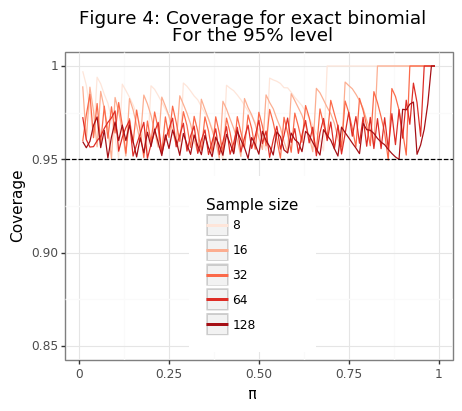

<ggplot: (8780656319109)>

In [93]:
# Function to calculate t*_alpha
def qbinom(alpha, n, pi):
    assert (alpha >= 0) & (alpha <= 1)
    kstar = int(stats.binom.ppf(q=alpha,n=n,p=pi)) # Use first quantile estimate
    Fk = stats.binom.cdf(k=kstar,n=n,p=pi) # Calculate p-value
    check = bool(np.where(alpha>0.5, Fk>=alpha, Fk<=alpha))
    while not check:
        kstar = int(np.where(alpha>0.5, kstar+1, kstar-1))
        Fk = stats.binom.cdf(k=kstar,n=n,p=pi)
        check = bool(np.where(alpha>0.5, Fk>=alpha, Fk<=alpha))
    return kstar

nsim = 100000
alpha = 0.05
pi_seq = np.round(np.arange(0.01,1,0.01),2)
n_seq = 2**np.arange(3,8,1)

holder = []
for pi in pi_seq:
    for n in n_seq:
        # Establish the lower bound
        kstar = qbinom(alpha=1-alpha, n=n, pi=pi)
        # Draw data under the null
        khat = np.random.binomial(n, pi, size=nsim)
        phat = khat / n
        phat_ub = kstar / n
        coverage = np.mean(phat <= phat_ub)
        tmp = pd.DataFrame({'pi':pi,'n':n,'coverage':coverage},index=[0])
        holder.append(tmp)
sim_exact = pd.concat(holder).reset_index(None,True).assign(n=lambda x: pd.Categorical(x.n, x.n.unique()))

plotnine.options.figure_size = (5, 4)
gg_cov_exact = (ggplot(sim_exact, aes(x='pi',y='coverage',color='n'))+
               theme_bw() + geom_line() + 
               labs(x='π',y='Coverage') + 
               ggtitle('Figure 4: Coverage for exact binomial\nFor the 95% level') + 
               theme(legend_position=(0.5,0.35)) + 
               scale_y_continuous(limits=[0.85,1.0],breaks=list(np.arange(0.85,1.01,0.05))) + 
               geom_hline(yintercept=0.95,linetype='--') + 
               scale_color_brewer(name='Sample size', palette='Reds'))
gg_cov_exact

Figure 4 demonstrates how we can obtain a conservative coverage region for the binomial distribution. Keep in mind that in the case where $\pi$ is close to 0 or 1, and $n$ is small, the coverage region may amount to 100% for the 95% level! Though we have not yet even discussed power calculations for these exact CIs, it is clear that no sample size will be sufficient to reject the null in this case. For example if $n=8$ and $\pi=0.7$, then $F(7)=0.94$ and $F(8)=1.0$, so the coverage region amounts to $\hat p \leq 1$! In summary, though "exact" confidence intervals will not be able to obtain exact coverage due to their discrete nature. The second issue with using exact CIs for two proportions from a binomial distribution is that we need to develop a custom CDF and its quantile for $\delta=y_1 - y_2$. 

$$
\begin{align*}
s(d;\mathbf{n}, \mathbf{\pi}) &= \{ f_{Y_1}(k_1;n_1,\pi_1) \cdot f_{Y_2}(k_2;n_2,\pi_2) \hspace{1mm} | \hspace{1mm} k_1-k_2=d \} \\
f_\delta(d; \mathbf{n}, \mathbf{\pi}) &= \sum_{ s_i \in s(d)} s_i \\
F_\delta(d; \mathbf{n}, \mathbf{\pi}) &= P(K_1 - K_2 \leq d) \\
&= \sum_{j=-n_2}^d f_\delta(j; \mathbf{n}, \mathbf{\pi})
\end{align*}
$$

Computationally its easiest to calculate the PMF/CDF as a matrix and then group by all the values from $[-n_2,\dots,n_1]$ as the function `binom_diff` class shows below.

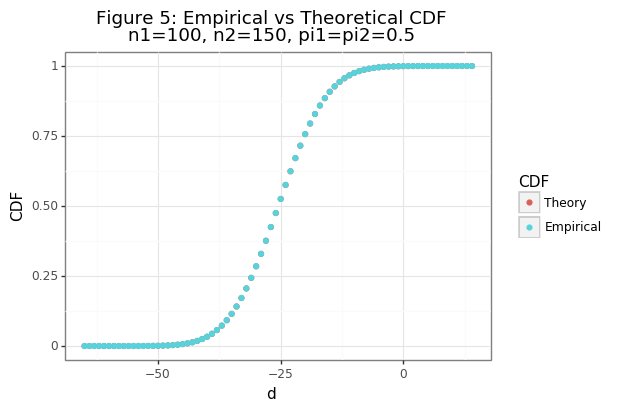

<ggplot: (8780641036737)>

In [287]:
class binom_diff():
    def __init__(self, n1, pi1, n2, pi2):
        check1 = (n1 >= 0) & (n2 >= 0) & (isinstance(n1,int)) & (isinstance(n1,int))
        check2 = (pi1 >= 0) & (pi1 <= 0) & (pi2 >= 0) & (pi2 <= 0)
        y1seq, y2seq = np.meshgrid(range(n1+1), range(n2+1)) # create the actual grid
        y1seq, y2seq = y1seq.flatten(), y2seq.flatten()
        s_d = stats.binom.pmf(y1seq, n1, pi1) * stats.binom.pmf(y2seq, n2, pi2)
        self.df = pd.DataFrame({'d':y1seq-y2seq,'pdf':s_d}).groupby('d').pdf.sum().reset_index()
        assert np.abs(self.df.pdf.sum() - 1) < 1e-6
        self.df['cdf'] = self.df.pdf.cumsum()
    def cdf(self, d):
        return self.df.query('d == @d').cdf.values[0]
    def qdf(self, p):
        assert (p >= 0) & (p <= 1)
        if p > 0.5:
            dstar = dist.df.query('cdf >= @p').head(1).d.values[0]
        elif p < 0.5:
            dstar = self.df.query('cdf <= @p').tail(1).d.values[0]
        else:
            dstar = int(self.df.loc[np.argmin((self.df.cdf-0.5)**2)]['d'])
        return dstar
    
# Check that the QQ-plots line up
np.random.seed(seed)
nsim = 10000000
n1, n2 = 100, 150
pi1, pi2 = 0.5, 0.5
res = pd.Series(np.random.binomial(n1,pi1,nsim) - np.random.binomial(n2,pi2,nsim)).value_counts(True).reset_index()
res = res.rename(columns={'index':'n',0:'p'}).sort_values('n').reset_index(None,True)
dist_dbinom = binom_diff(n1, pi1, n2, pi2)
df_comp = res.assign(ecdf=lambda x: x.p.cumsum()).drop(columns='p')
df_comp = df_comp.merge(dist_dbinom.df,'left',left_on='n',right_on='d').drop(columns='pdf')
df_comp = df_comp.melt('d',['cdf','ecdf'],'tt')

title5 = 'Figure 5: Empirical vs Theoretical CDF\nn1=100, n2=150, pi1=pi2=0.5'
plotnine.options.figure_size = (5.5, 4)
gg_cdf_check = (ggplot(df_comp, aes(x='d',y='value',color='tt')) + theme_bw() + 
                geom_point() + labs(y='CDF',x='d') + ggtitle(title5) + 
                scale_color_discrete(name='CDF',labels=['Theory','Empirical']))
gg_cdf_check

In [279]:
# Ensure we can can 1-alpha coverage for the difference in distributions...

Figures 5 and 6 show that we can accurate calculate the CDF and quantile for the difference in binomial distributions to obtain valid coverage.

## Wilson Method

If we want to either....

## Arcsin

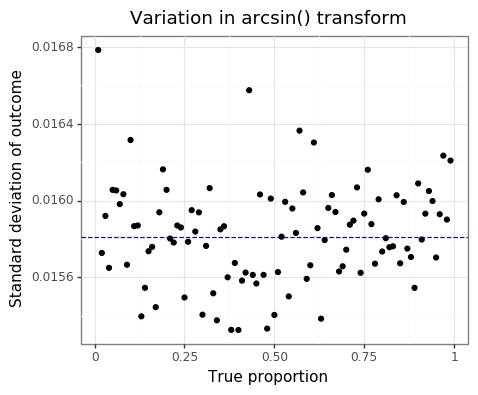

<ggplot: (8780654506261)>

In [5]:
p_seq = np.round(np.arange(0.01, 1, 0.01),2)
n = 1000
nsim = 2500
np.random.seed(seed)
df_arcsin = pd.concat([pd.DataFrame({'phat':[np.random.binomial(n,p)/n for z in range(nsim)],'p':p}) for p in p_seq])
df_arcsin = df_arcsin.assign(ptrans= lambda x: np.arcsin(np.sqrt(x.phat)))
df_arcsin_var = df_arcsin.groupby('p').ptrans.std().reset_index().rename(columns={'ptrans':'var_trans'})

gg_arcsin = (ggplot(df_arcsin_var, aes(x='p',y='var_trans')) + theme_bw() + 
             geom_point() + 
             geom_hline(yintercept=np.sqrt(1/(4*n)),color='blue',linetype='--') + 
             labs(x='True proportion',y='Standard deviation of outcome') + 
             ggtitle('Variation in arcsin() transform'))
gg_arcsin

<br>
* * * 

### Footnotes

[^1]: I discuss this phenomenon at length in this [post](http://www.erikdrysdale.com/winners_curse) and provide some methods to correct for lower-powered tests.
